In [1]:
import pandas as pd
import numpy as np

In [2]:
#File path
file_path = r'D:\NEW PROJECTS\Market size of ev\EV-data\Electric_Vehicle_Population_Data.csv'
#Uploading Data
ev_data = pd.read_csv(file_path)

In [3]:
#Reading data
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [4]:
#cleaning DATA
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
#checking null values
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
#Tasks
#1.EV Adoption Over Time: Analyze the growth of the EV population by model year.
#2.Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
#3.EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
#4.Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
#5.Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
#6.Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

In [7]:
#Checking distinct values for EV adobtion over year
# lets see the count year by year
ev_data['Model Year'].unique()
ev_data['Model Year'].value_counts()

Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

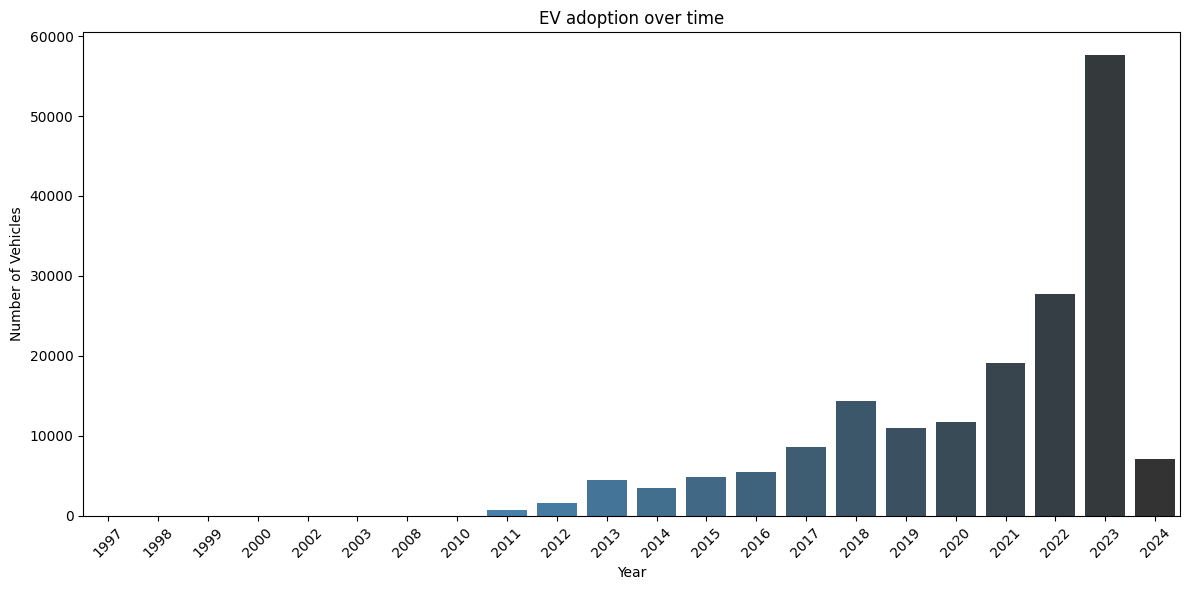

In [8]:
#1 lets make chart for better understanding
import matplotlib.pyplot as plt
import seaborn as sns

#EV adoption overtime
#setting fiq size
plt.figure(figsize=(12,6))
#Getting data for chart
ev_adoption_over_time = ev_data['Model Year'].value_counts().sort_index()
#crating a bar chart with x and y axix
sns.barplot(x=ev_adoption_over_time.index, y = ev_adoption_over_time.values,palette="Blues_d",hue=ev_adoption_over_time.index,dodge=False,legend=False,)
plt.title('EV adoption over time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
#2.Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
#we have country state city
# lets see distinct count
# This data is only for USA so Lets see distinct states
ev_data['County'].unique()

array(['King', 'Snohomish', 'Kitsap', 'Thurston', 'Yakima', 'Island',
       'Chelan', 'Skagit', 'Spokane', 'Walla Walla', 'Grant', 'Stevens',
       'Whitman', 'Kittitas', 'Pend Oreille', 'Clark', 'Cowlitz',
       'Jefferson', 'Clallam', 'Klickitat', 'Pierce', 'Grays Harbor',
       'Whatcom', 'Skamania', 'Wahkiakum', 'Washoe', 'Benton', 'Franklin',
       'Lewis', 'San Juan', 'Mason', 'Okanogan', 'Douglas', 'Adams',
       'Pacific', 'Asotin', 'District of Columbia', 'Columbia', 'Lincoln',
       'Kern', 'Cumberland', 'Oldham', 'Orange', 'Stafford', 'Montgomery',
       'York', 'Sonoma', 'San Diego', 'Marin', 'Ferry', 'Santa Clara',
       'Contra Costa', 'Lake', "St. Mary's", 'Nueces', 'Platte',
       'Los Angeles', 'DeKalb', 'Lee', 'Bexar', 'Fairfax', 'Anne Arundel',
       'Madison', 'Saratoga', 'Maricopa', 'Middlesex', 'Mobile',
       'Rockdale', 'Essex', 'Parker', 'El Paso', 'Honolulu', 'Tooele',
       'Kent', 'Alexandria', 'Autauga', "Prince George's", 'Cook',
       'DuPag

In [10]:
ev_data['County'].value_counts()

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Currituck        1
Laramie          1
Boulder          1
Bartow           1
Hardin           1
Name: count, Length: 196, dtype: int64

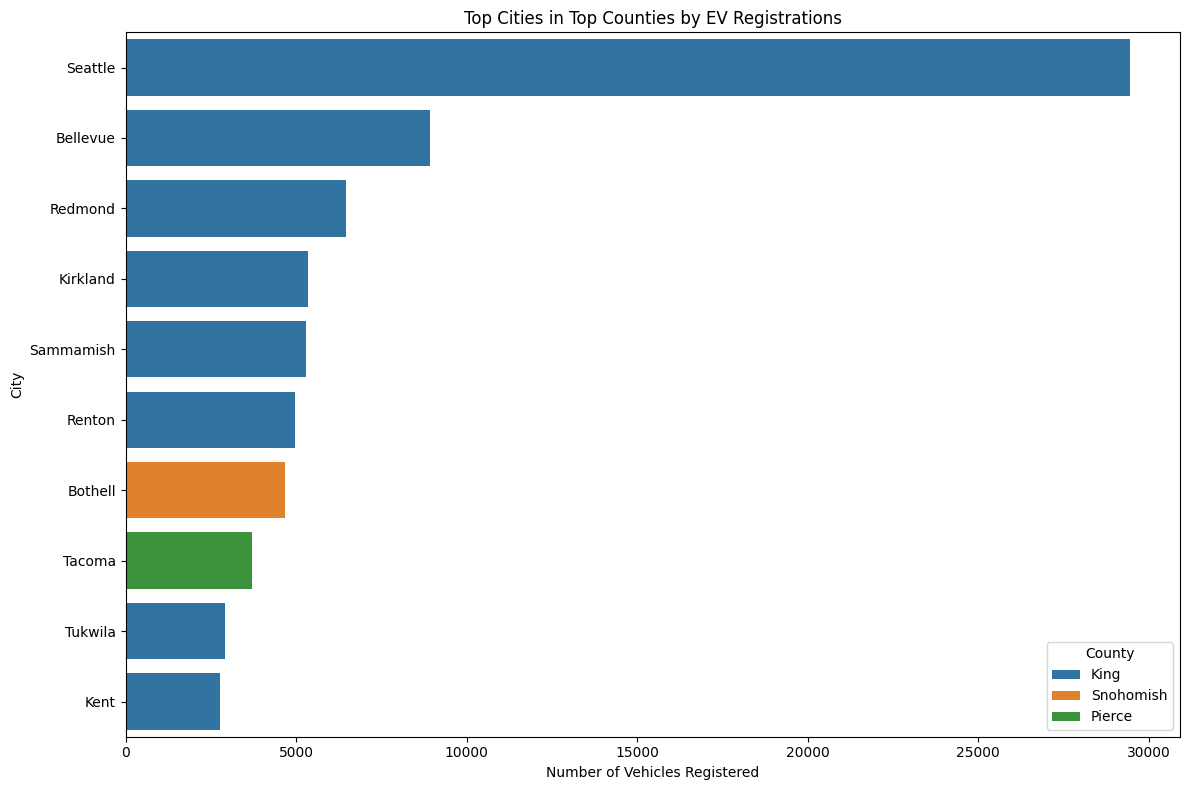

In [11]:
#2. distribution
ev_county_distribution = ev_data['County'].value_counts()
#top 3
top_county = ev_county_distribution.head(3).index

## filtering the dataset for these top counties
top_county_data = ev_data[ev_data['County'].isin(top_county)]

#analyzing ev distribution in cities of these top counties
ev_city_distribution = top_county_data.groupby(['County','City']).size().sort_values(ascending = False).reset_index(name='Number of Vehicles')

# top 10 cities in top 3 countries
top_city = ev_city_distribution.head(10)

#Creating visuals for 2

#creating bar graph
plt.figure(figsize = (12,8))
sns.barplot(x ='Number of Vehicles', y = 'City', hue = 'County', data = top_city)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')

plt.tight_layout()
plt.show()

In [12]:
#3.EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
ev_data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [13]:
#total values of each type
ev_typedata = ev_data['Electric Vehicle Type'].value_counts().sort_index()

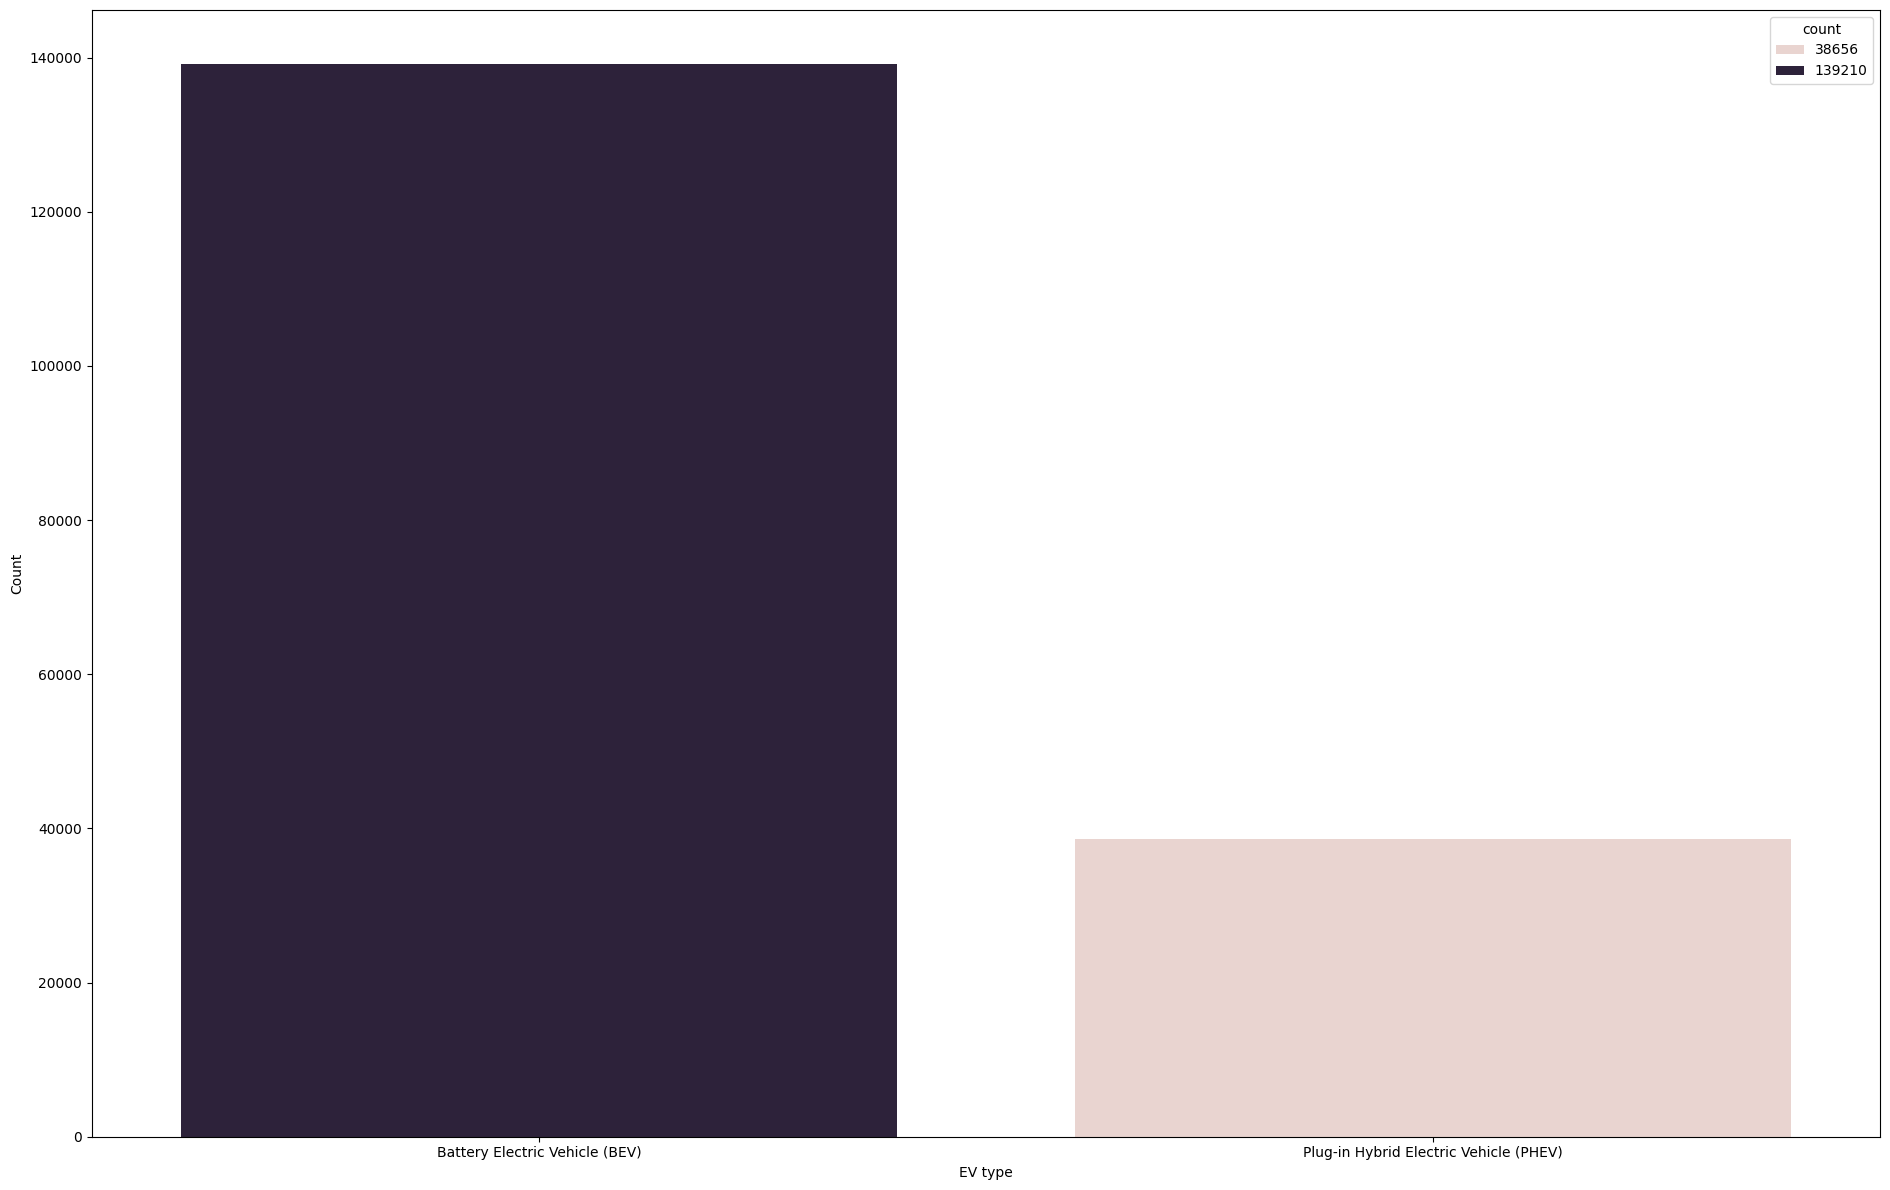

In [14]:
#Growth of Vehicle type year wise
plt.figure(figsize = (19,12))
barplot = sns.barplot(x =ev_typedata.index, y = ev_typedata.values, hue = ev_typedata)
plt.xlabel('EV type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
#4.Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
#thier are so many models lets address top 10
ev_model = ev_data['Make'].value_counts().head(10)



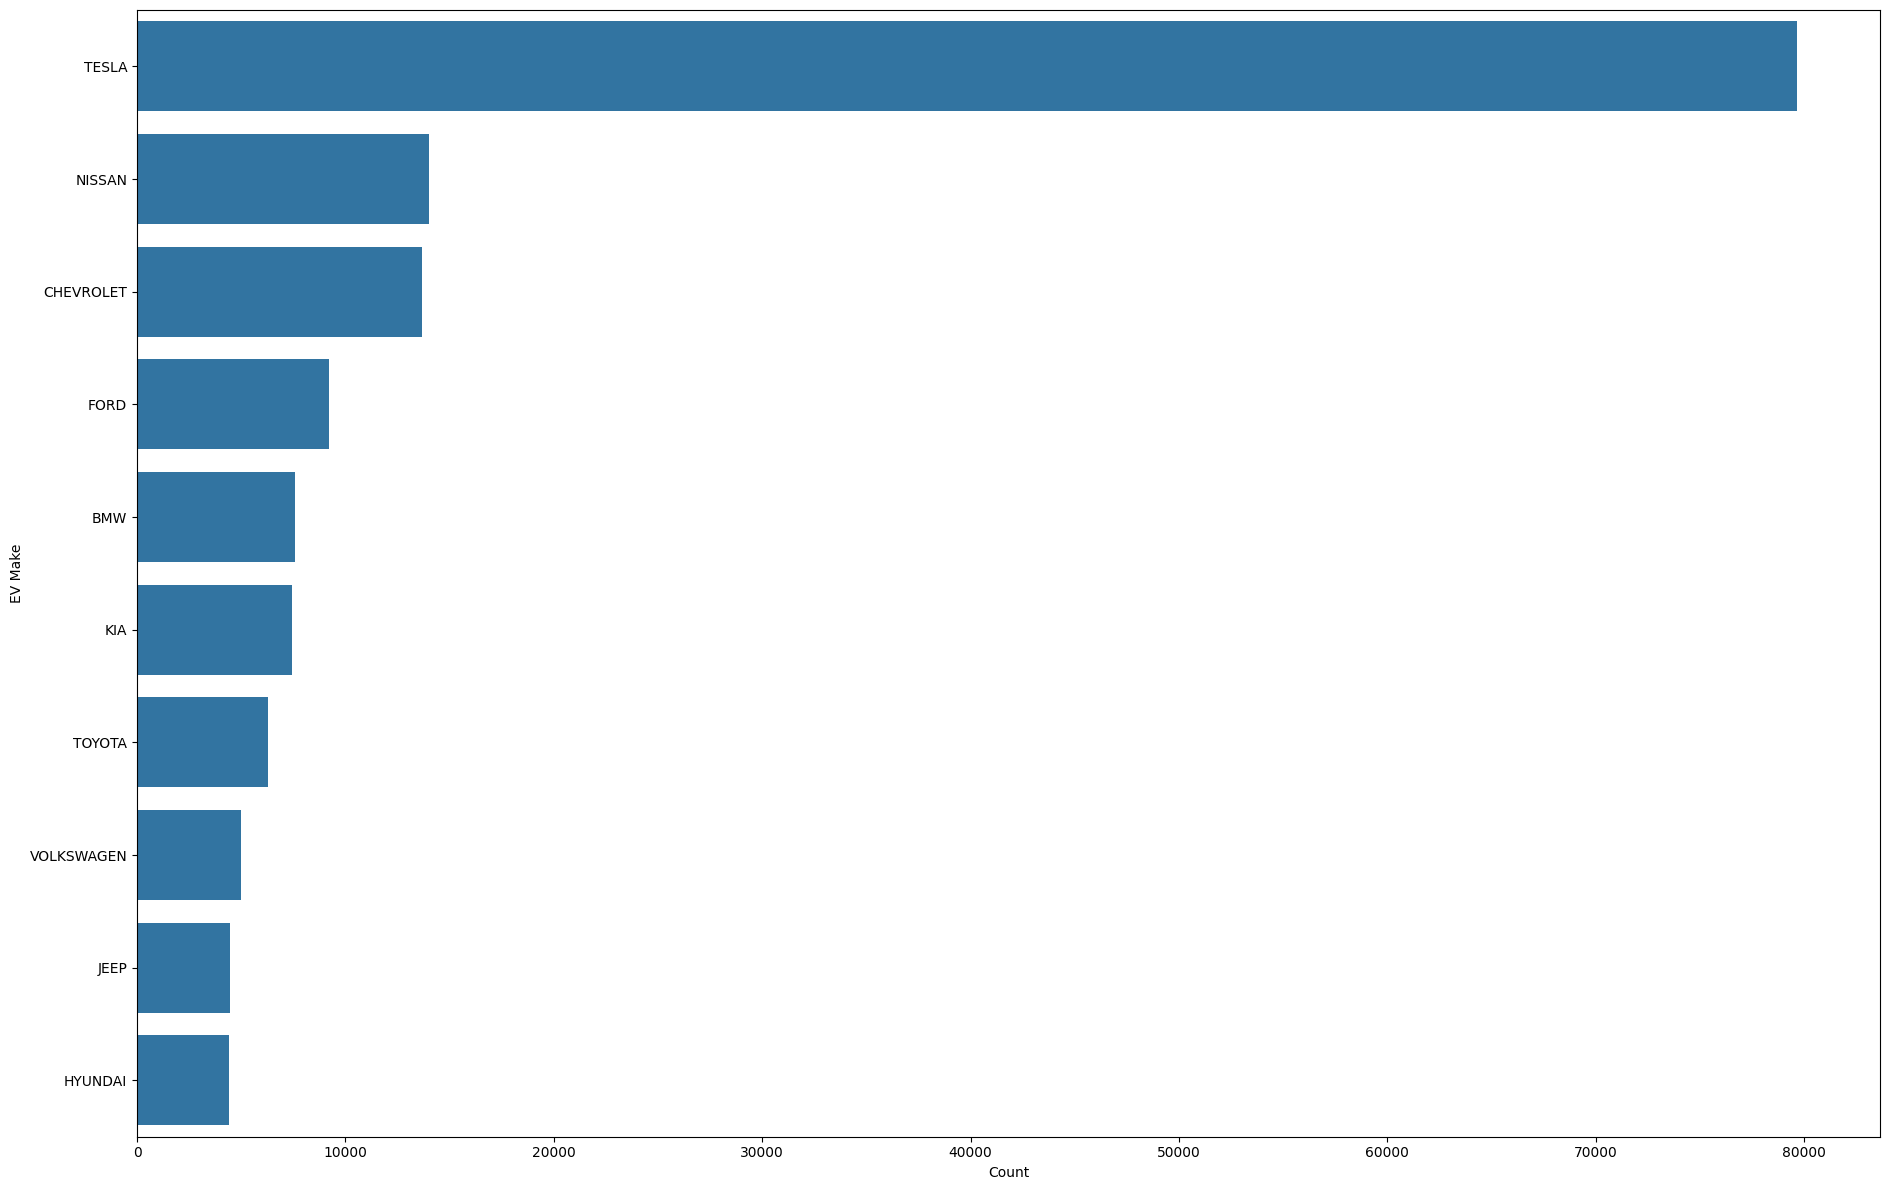

In [16]:
plt.figure(figsize = (19,12))
sns.barplot(y =ev_model.index, x = ev_model.values)
plt.ylabel('EV Make')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

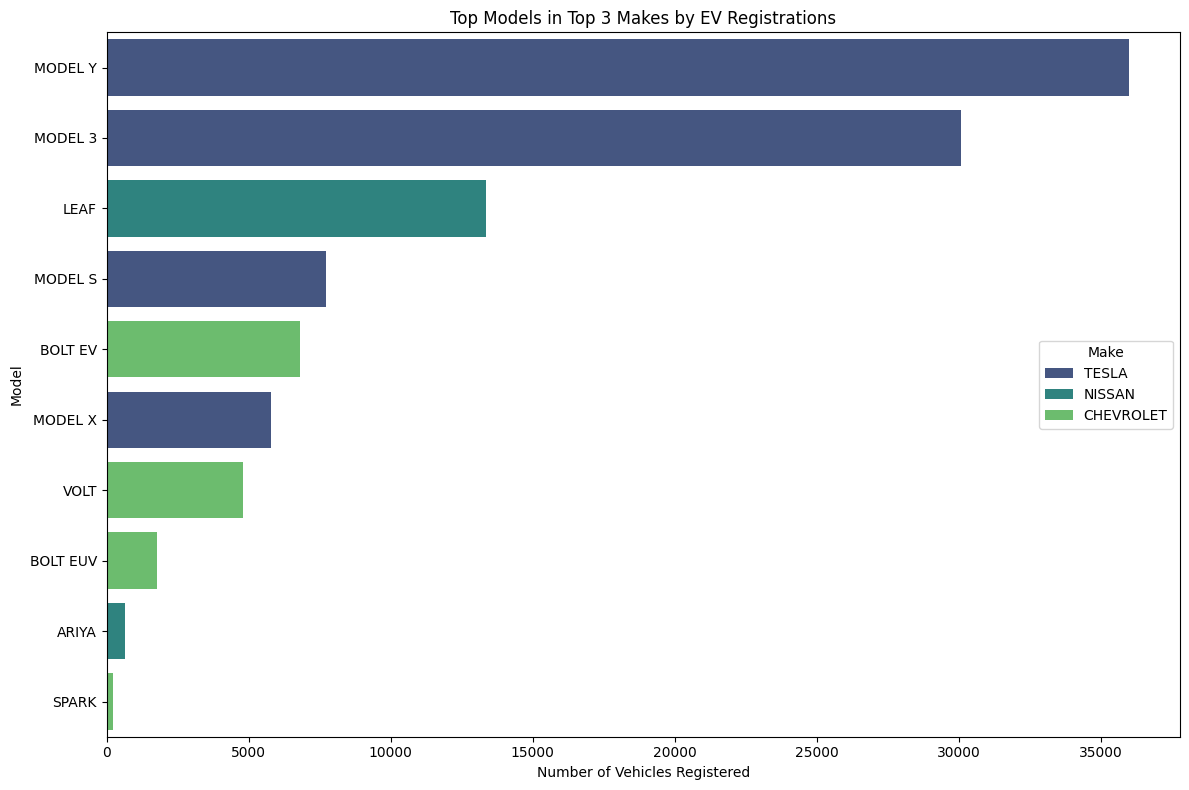

In [17]:
#top models of top 3
evtop3_modeldata = ev_model.head(3)
top_makes = ev_data[ev_data['Make'].isin(evtop3_modeldata.index)]
top_makes_in_top_companies = top_makes.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = top_makes_in_top_companies.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

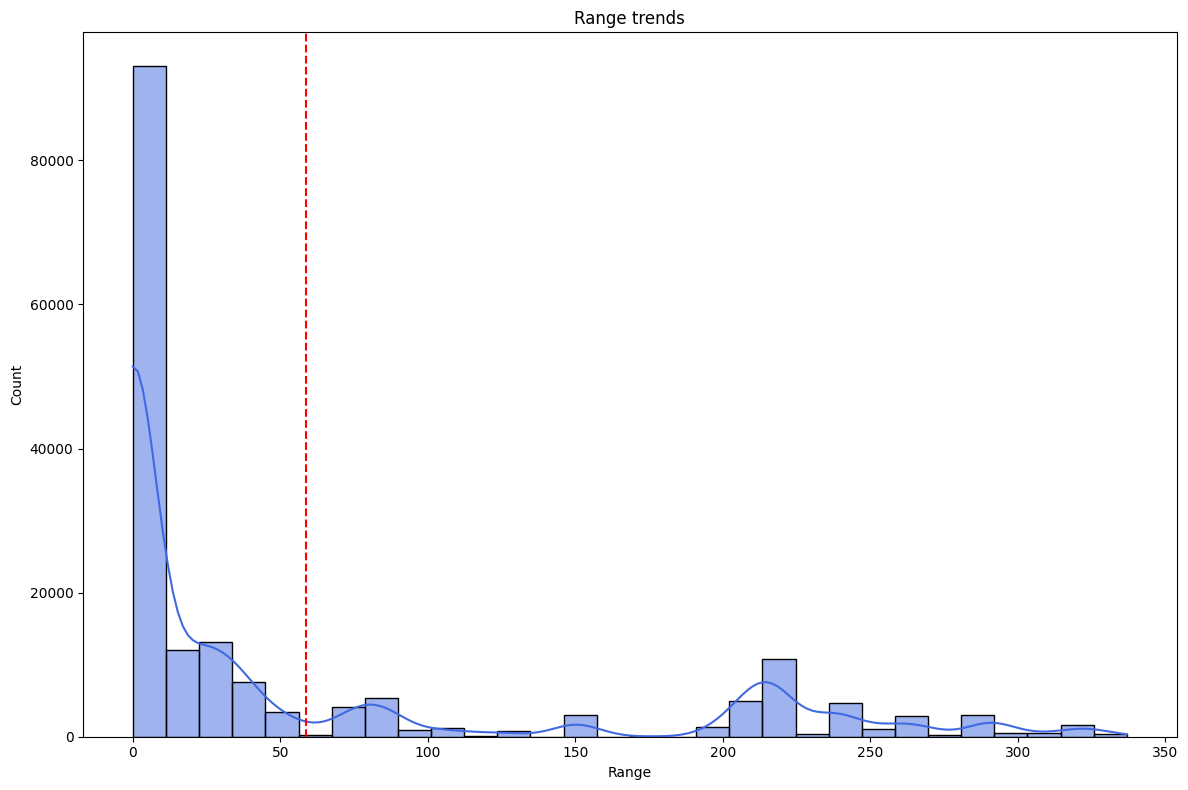

In [18]:
#5.Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
ev_range = ev_data['Electric Range'].value_counts()

plt.figure(figsize=(12, 8))
sns.histplot(ev_data['Electric Range'], bins = 30,kde = True, color = 'royalblue')
plt.title('Range trends')
plt.xlabel('Range')
plt.ylabel('Count')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.tight_layout()
plt.show()

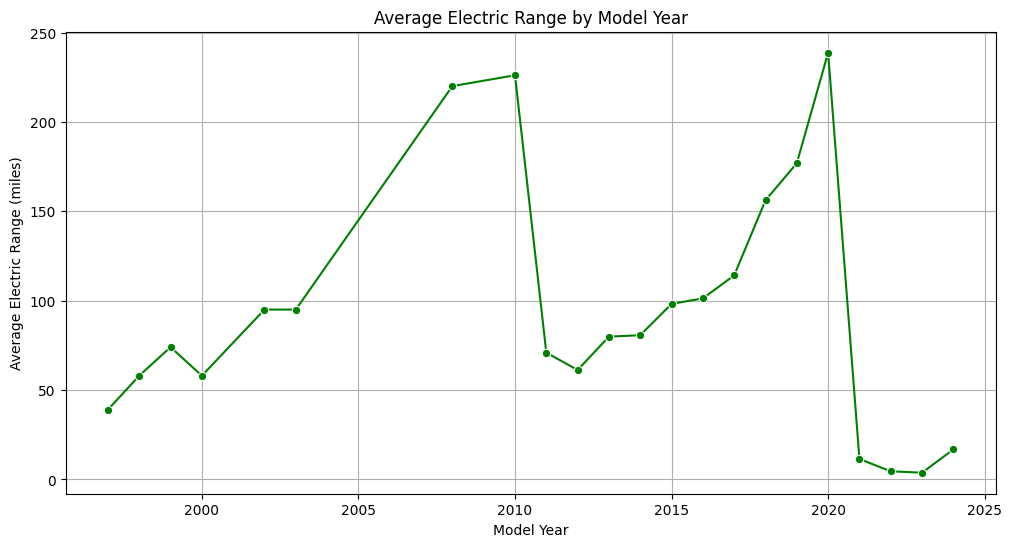

In [19]:
#Average range by years
range_byyear= ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=range_byyear, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

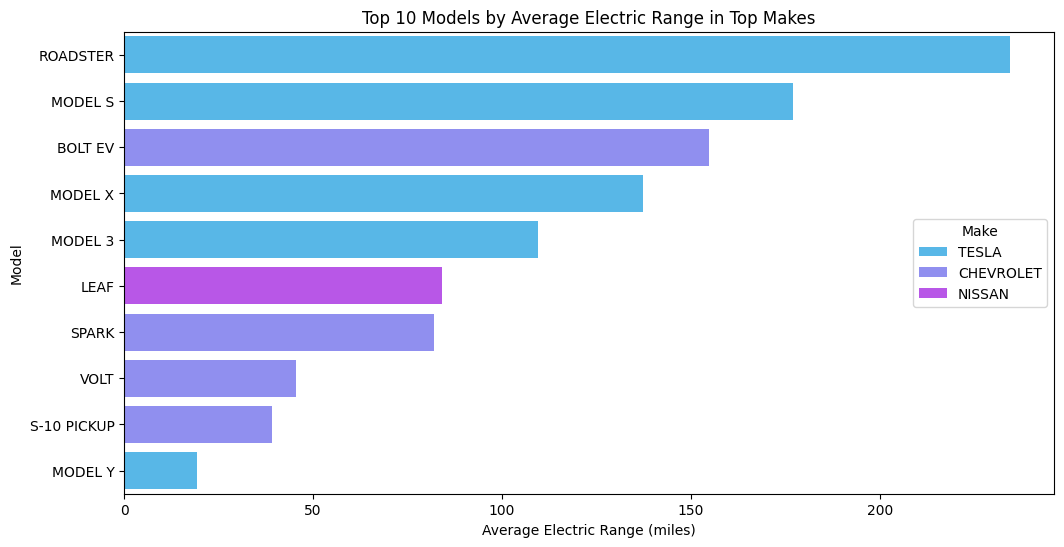

In [20]:
#Lets Explore Rnage for the top manufactures and models
average_range_models = top_makes.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
Average_final = average_range_models.head(10)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(y='Model', x='Electric Range',hue = 'Make', data=Average_final, palette='cool')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [31]:
#To estimate the market size 
#first i'll count number of ev registerd per year
ev_resigtration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_resigtration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [34]:
#as we can see growth is exponential we will use a expoenetial model froestimation for next few years
#but as from observation 2024 data seems to be missing so we will use data till 2023 to estimate 2024, 25,26,27,28,29
import scipy
from scipy.optimize import curve_fit
import numpy as np
# curve_fit: A function from scipy.optimize used for fitting a custom model to data. It estimates the parameters of the model.
# numpy (np): A library for numerical computations in Python.

#Filtering the dataset 

# Goal: Restrict the dataset to only include years with complete data, assuming 2023 is the latest year with complete information.
# ev_registration_counts: Likely a Pandas Series with years as the index and registration counts as values.
# Filtered Data: Removes data beyond 2023
filtered_years = ev_resigtration_counts[ev_resigtration_counts.index <= 2023]
# Define the Exponential Growth Function

#Goal: Define a mathematical model for exponential growth.
#Equation is y = a*x^(b)
#                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           a: Initial value (scales the function).
# b: Growth rate (determines how fast the value grows over time).
# x: Time or independent variable
def exp_growth(x, a, b):
    return a * np.exp(b * x)
# Goal: Define a mathematical model for exponential growth.
# Prepare Data for Curve Fitting 
#normalizing data
x_data = filtered_years.index - filtered_years.index.min()
# Normalize x_data: Subtracts the minimum year to start 
# x from 0 (e.g., 2020 → 0, 2021 → 1). This improves numerical stability during curve fitting.
y_data = filtered_years.values
# y_data: The actual EV registration counts (dependent variable).

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

forecasted_evs

{np.int64(2024): np.float64(79092.26358070358),
 np.int64(2025): np.float64(119565.00850312428),
 np.int64(2026): np.float64(180748.2882793602),
 np.int64(2027): np.float64(273240.0066284026),
 np.int64(2028): np.float64(413061.179903938),
 np.int64(2029): np.float64(624431.02841697)}

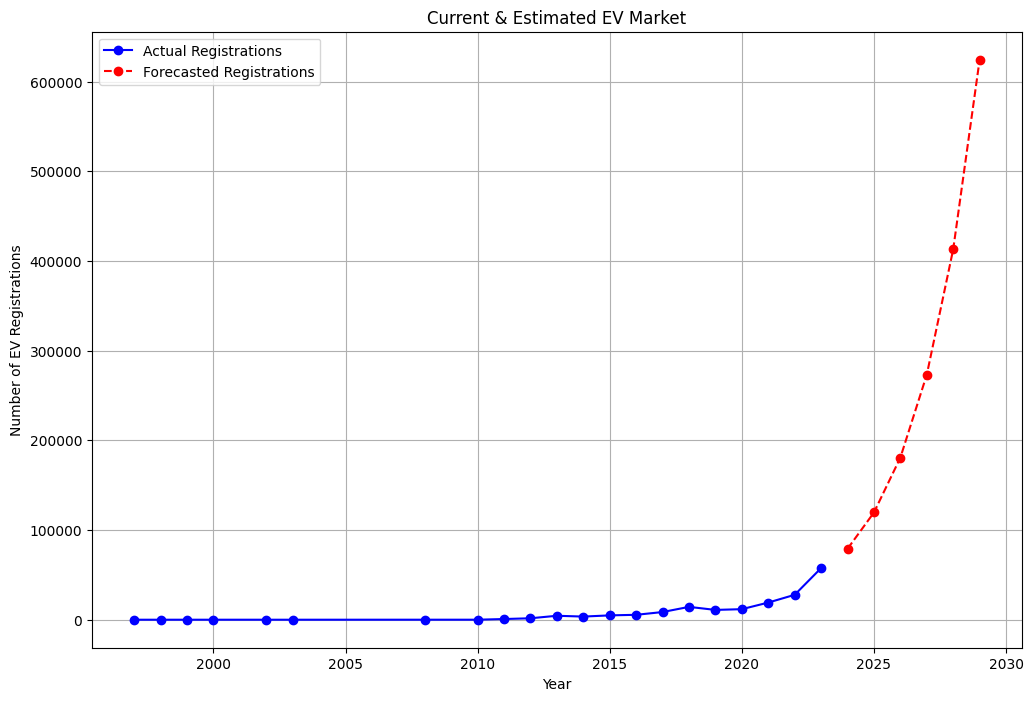

In [35]:
#Now, let’s plot the estimated market size data:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()